# Hypothesis testing

## Creating data

I used ChatGPT to make some data that can be used for hypothesis testing.

I want to try the following on the data:

- **Shapiro-Wilk test:** checks if a sample comes from a normal distribution (normality test).

- **t-test:** compares the means of two independent groups, assuming normality.

- **ANOVA:** compares the means of three or more groups, assuming normality.

- **Chi-squared test:** tests for association between categorical variables.

- **Pearson correlation:** tests for a linear relationship between two continuous variables.

- **Mann-Whitney U test:** compares two independent groups when normality cannot be assumed (nonparametric alternative to the t-test).

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Exam scores by study method (t-test / ANOVA / Shapiro-Wilk) ---
exam_scores = pd.DataFrame({
    "id": range(1, 10),
    "method": ["flashcards"]*3 + ["rereading"]*3 + ["practice_test"]*3,
    "score": [75, 80, 78, 70, 72, 68, 85, 88, 84]
})

# --- 2. Gender vs preference (Chi-square / Fisher's Exact) ---
preference_data = pd.DataFrame({
    "gender": ["male", "male", "female", "female"],
    "prefers_online": ["yes", "no", "yes", "no"],
    "count": [30, 20, 25, 25]
})

# --- 3. Study hours vs exam score (Pearson correlation) ---
correlation_data = pd.DataFrame({
    "student": range(1, 7),
    "study_hours": [2.0, 3.5, 4.0, 5.5, 6.0, 7.5],
    "exam_score": [60, 70, 72, 82, 85, 90]
})

# --- 4. Nonparametric comparison (Mann–Whitney U test) ---
nonparametric_data = pd.DataFrame({
    "group": ["A"]*5 + ["B"]*5,
    "satisfaction_score": [4, 5, 5, 3, 4, 2, 3, 3, 4, 2]
})

print("Dataset 1: Exam Scores")
print(exam_scores.head())

print("Dataset 2: Preference Data")
print(preference_data.head())

print("Dataset 3: Correlation Data")
print(correlation_data.head())

print("Dataset 4: Nonparametric Data")
print(nonparametric_data.head())

Dataset 1: Exam Scores
   id      method  score
0   1  flashcards     75
1   2  flashcards     80
2   3  flashcards     78
3   4   rereading     70
4   5   rereading     72
Dataset 2: Preference Data
   gender prefers_online  count
0    male            yes     30
1    male             no     20
2  female            yes     25
3  female             no     25
Dataset 3: Correlation Data
   student  study_hours  exam_score
0        1          2.0          60
1        2          3.5          70
2        3          4.0          72
3        4          5.5          82
4        5          6.0          85
Dataset 4: Nonparametric Data
  group  satisfaction_score
0     A                   4
1     A                   5
2     A                   5
3     A                   3
4     A                   4


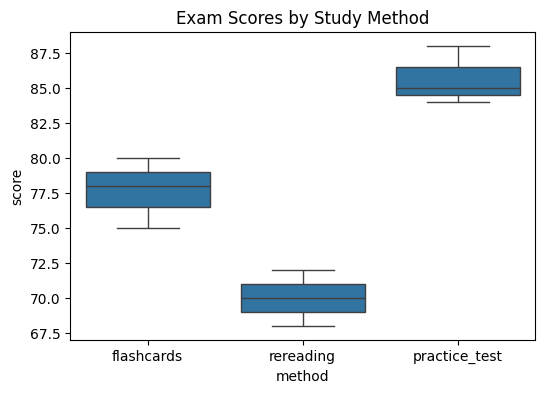

<Figure size 500x400 with 0 Axes>

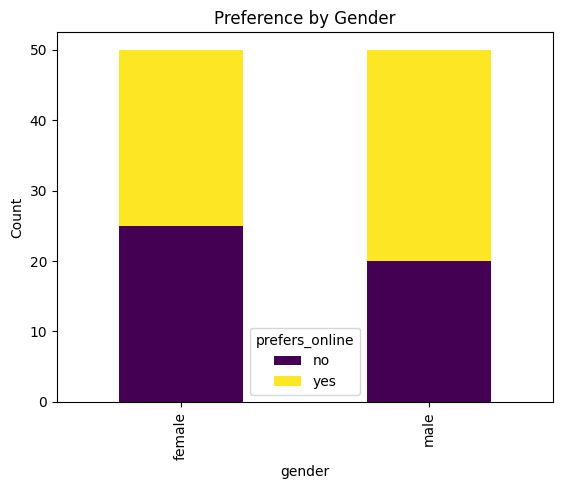

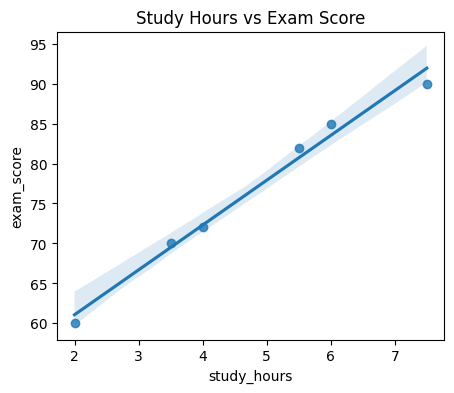

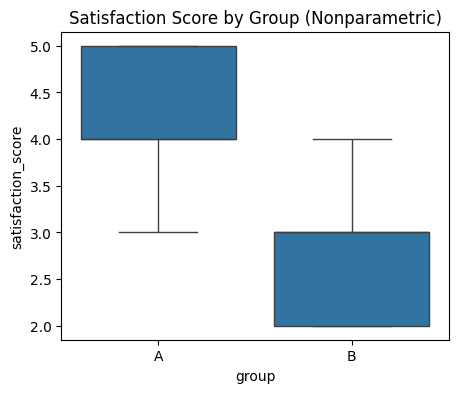

In [2]:
# Visualization:

plt.figure(figsize=(6,4))
sns.boxplot(data=exam_scores, x="method", y="score")
plt.title("Exam Scores by Study Method")
plt.show()

table = preference_data.pivot(index="gender", columns="prefers_online", values="count")
plt.figure(figsize=(5,4))
table.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Preference by Gender")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,4))
sns.regplot(data=correlation_data, x="study_hours", y="exam_score")
plt.title("Study Hours vs Exam Score")
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(data=nonparametric_data, x="group", y="satisfaction_score")
plt.title("Satisfaction Score by Group (Nonparametric)")
plt.show()


In [ ]:
# Separate groups
flashcards = exam_scores.query("method == 'flashcards'")["score"]
rereading = exam_scores.query("method == 'rereading'")["score"]
practice = exam_scores.query("method == 'practice_test'")["score"]

print("==============================")
print("Exam Scores by Study Method:")
print("==============================")
# Shapiro-Wilk normality test
for group, data in {"flashcards": flashcards, "rereading": rereading, "practice_test": practice}.items():
    stat, p = stats.shapiro(data)
    print(f"Shapiro-Wilk ({group}): p = {p:.3f} -> {'normal' if p>0.05 else 'not normal'}")

# Independent t-test
t_stat, p_val = stats.ttest_ind(flashcards, rereading, equal_var=False)
print(f"\nT-test (flashcards vs rereading): p = {p_val:.4f} -> {'significant' if p_val<0.05 else 'not significant'}")

# One-way ANOVA (all three groups)
f_stat, p_val = stats.f_oneway(flashcards, rereading, practice)
print(f"ANOVA (three methods): p = {p_val:.4f} -> {'significant' if p_val<0.05 else 'not significant'}")

print("\n==============================")
print("Online Preference by Gender:")
print("==============================")

chi2, p_val, dof, expected = stats.chi2_contingency(table)
print(f"\nChi-square test (gender vs online preference): p = {p_val:.4f} -> {'dependent' if p_val<0.05 else 'independent'}")

print("\n==============================")
print("Exam results vs. study hours:")
print("==============================")

correlation_data = pd.DataFrame({
    "study_hours": [2.0, 3.5, 4.0, 5.5, 6.0, 7.5],
    "exam_score": [60, 70, 72, 82, 85, 90]
})

r, p_val = stats.pearsonr(correlation_data["study_hours"], correlation_data["exam_score"])
print(f"\nPearson correlation (study hours vs exam score): r = {r:.3f}, p = {p_val:.4f} -> {'significant correlation' if p_val<0.05 else 'no significant correlation'}")

print("\n==============================")
print("Class satisfaction:")
print("==============================")

# Ordinal data, cannot make t-test assumptions -> Mann-Whitney U test

A = nonparametric_data.query("group == 'A'")["satisfaction_score"]
B = nonparametric_data.query("group == 'B'")["satisfaction_score"]

for group, data in {"A": A, "B": B}.items():
    stat, p = stats.shapiro(data)
    print(f"Shapiro-Wilk ({group}): p = {p:.3f} -> {'normal' if p>0.05 else 'not normal'}")

u_stat, p_val = stats.mannwhitneyu(A, B, alternative="two-sided")
print(f"\nMann-Whitney U test (A vs B): p = {p_val:.4f} -> {'significant' if p_val<0.05 else 'not significant'}")


Exam Scores by Study Method:
Shapiro-Wilk (flashcards): p = 0.780 -> normal
Shapiro-Wilk (rereading): p = 1.000 -> normal
Shapiro-Wilk (practice_test): p = 0.463 -> normal

T-test (flashcards vs rereading): p = 0.0160 -> significant
ANOVA (three methods): p = 0.0004 -> significant

Online Preference by Gender:

Chi-square test (gender vs online preference): p = 0.4214 -> independent

Exam results vs. study hours:

Pearson correlation (study hours vs exam score): r = 0.993, p = 0.0001 -> significant correlation

Class satisfaction:
Shapiro-Wilk (A): p = 0.314 -> normal
Shapiro-Wilk (B): p = 0.314 -> normal

Mann–Whitney U test (A vs B): p = 0.0524 -> not significant


## Results

I chose a significance level of 0.05. Results with p-values below this threshold are considered statistically significant. With that:

- Exam scores by study method: Both the independent t-test (flashcards vs rereading, p = 0.016) and one-way ANOVA (all three methods, p = 0.0004) were significant. This suggests that study method affects exam performance, and at least one method differs from the others. All groups passed the Shapiro-Wilk normality test, so parametric tests were appropriate.

- Online learning preference by gender: The chi-square test (p = 0.421) was not significant, indicating no evidence of association between gender and online learning preference.

- Study hours vs. exam score: Pearson correlation was very strong and significant (r = 0.993, p = 0.0001), showing a clear positive linear relationship: more study hours correspond to higher exam scores.

- Class satisfaction (nonparametric test): Both groups A and B passed the Shapiro-Wilk normality test, but the data is ordinal so I chose Mann-Whitney U test instead of the t-test. It (p = 0.0524) was not significant (not < 0.05). There is no **strong** evidence that satisfaction differs between the groups, but the result is borderline.